In [97]:
#use different method to find a certain eigenvalue and eigenvector pair
#(a)Power Method (max eigenvalue)
#(b)Symmetric Power Method (max eigenvalue)
#(c)Inverse Power Method (min eigenvalue)
#(d)Inverse Power Method closest to 2.5
#(e)Varaiant Inverse Power Method closest to 2.5

#usage = for biweekly quiz 7 for class PMS.CM Chang @ NCTU AM 11
#Biweekly quiz 7 power method and its variants
#Pactice of Mathematics Software

#author = maxwill lin =  yt lin
#school number = 0712238@NCTU

#created 2019.12.24
#modified 2019.12.27 err graph + variant inverse shifted

#show ans by printing out

In [57]:
import numpy as np
import scipy
import scipy.linalg
import matplotlib.pyplot as plt

In [4]:
A = np.eye(12)*4
for i in range(0,3):
    A[i][i+1] = A[i+1][i] = -1
for i in range(0,3):
    A[11-i][10-i] = A[10-i][11-i] = -1
for i in range(0,4):
    A[5+i][3+i] = A[3+i][5+i] = -1 
A[4][0] = A[0][4] = -1
A[7][11] = A[11][7] = -1
print(A)
b = np.asarray([220, 110, 110, 220, 110, 110, 110, 110, 220, 110, 110, 220]).T

eps = 1e-5
x0 = np.zeros(A.shape[0])

[[ 4. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  4. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  4. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  4.  0. -1.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  4.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  4.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  4.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  4.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  4. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  4. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  4. -1.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  0. -1.  4.]]


In [78]:
def PowerIteration(A, v=None, eps=10e-10, max_iter=1500):
    rec = []
    if v == None:
        v = np.random.randn(A.shape[0])
        v /= np.linalg.norm(v)
    for t in range(max_iter):
        y = np.dot(A, v)
        if(np.linalg.norm(y) < eps):
            print("A has eigencalue 0, try anothor x0")
            return 0, y
        #Rayleigh quotient
        lamb = v.dot(np.dot(A,v))/v.dot(v)
        err = np.linalg.norm(abs(v)-abs(y/np.linalg.norm(y)))
        rec.append(err)
        if err < eps:
            print("Converge at {} iteration(with diff), v = ".format(t), '\n',v)
            return lamb, v, rec
        v = y/np.linalg.norm(y)
    print("Use Max iteration {} still dont converge, v = ".format(max_iter), '\n',v)
    return lamb, v, rec

Converge at 479 iteration(with diff), v =  
 [-0.28867513  0.28867513 -0.28867513  0.28867513  0.28867513 -0.28867513
 -0.28867513  0.28867514  0.28867513 -0.28867514  0.28867514 -0.28867514]
eigenvalue = 6.0, 
eigenvector = [-0.28867513  0.28867513 -0.28867513  0.28867513  0.28867513 -0.28867513
 -0.28867513  0.28867514  0.28867513 -0.28867514  0.28867514 -0.28867514]


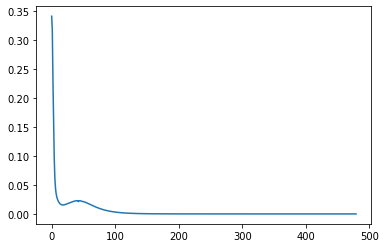

In [80]:
lamb, v, rec = PowerIteration(A, v=None, eps=1e-10, max_iter=1500)
print("eigenvalue = {}, \neigenvector = {}".format(lamb, v))
plt.figure()
plt.plot(rec)
plt.show()

In [75]:
#A should be symmetric
def SymmetricPowerIteration(A, v=None, eps=10e-10, max_iter=500):
    assert(A.T.all() == A.all())
    rec = []
    if v == None:
        v = np.random.randn(A.shape[0])
        v /= np.linalg.norm(v)
        #print("x0 = \n", v)
    for t in range(max_iter):
        y = np.dot(A, v)
        #use this mu, no Rayleigh quotient
        mu = np.dot(v.T, y)
        if(np.linalg.norm(y) < eps):
            print("A has eigencalue 0, try anothor x0")
            return 0, y
        err = np.linalg.norm(abs(v)-abs(y/np.linalg.norm(y)))
        rec.append(err)
        if err < eps:
            print("Converge at {} iteration(with diff), v = ".format(t), '\n',v)
            return mu, v, rec
        v = y/np.linalg.norm(y)
        #print("{}\n".format(mu), y)
    print("Use Max iteration {} still dont converge, v = ".format(max_iter), '\n',v)
    return mu, v, rec

Converge at 401 iteration(with diff), v =  
 [-0.28867514  0.28867514 -0.28867513  0.28867513  0.28867514 -0.28867513
 -0.28867514  0.28867513  0.28867514 -0.28867514  0.28867513 -0.28867513]
eigenvalue = 6.000000000000002, 
eigenvector = [-0.28867514  0.28867514 -0.28867513  0.28867513  0.28867514 -0.28867513
 -0.28867514  0.28867513  0.28867514 -0.28867514  0.28867513 -0.28867513]


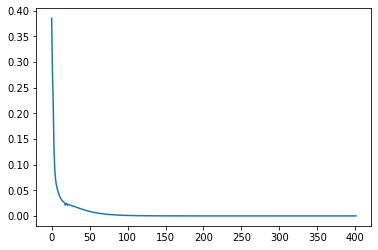

In [76]:
lamb, v, rec = SymmetricPowerIteration(A, v=None, eps=10e-10, max_iter=500)
print("eigenvalue = {}, \neigenvector = {}".format(lamb, v))
plt.figure()
plt.plot(rec)
plt.show()

In [72]:
def InversePowerIteration(A, v=None, eps=10e-10, max_iter=500):
    rec = []
    if v == None:
        v = np.random.randn(A.shape[0])
        v /= np.linalg.norm(v)
    lu, piv = scipy.linalg.lu_factor(A) # compute LU factorization of A
    for t in range(max_iter):
        y = scipy.linalg.lu_solve((lu, piv), v) #cuse LU fast compute A-1v
        if(np.linalg.norm(y) < eps):
            print("A has eigencalue 0, try anothor x0")
            return 0, v
        lamb = v.dot(np.dot(A,v))/v.dot(v)
        err = np.linalg.norm(abs(v)-abs(y/np.linalg.norm(y)))
        rec.append(err)
        #print("at iteration {}, diff of vk+1 and vk is {}".format(t, err))
        if err < eps:
            print("Converge at {} iteration(with diff), v = ".format(t), '\n',v)
            return lamb, v, rec
        v = y/np.linalg.norm(y)
    print("Use Max iteration {} still dont converge, v = ".format(max_iter), '\n',v)
    return lamb, v, rec

Converge at 29 iteration(with diff), v =  
 [-0.22358506 -0.36441997 -0.40760884 -0.34157925 -0.02284072 -0.18402378
  0.18402378  0.02284072  0.34157925  0.40760884  0.36441997  0.22358506]
eigenvalue = 2.267949192431123, 
eigenvector = [-0.22358506 -0.36441997 -0.40760884 -0.34157925 -0.02284072 -0.18402378
  0.18402378  0.02284072  0.34157925  0.40760884  0.36441997  0.22358506]


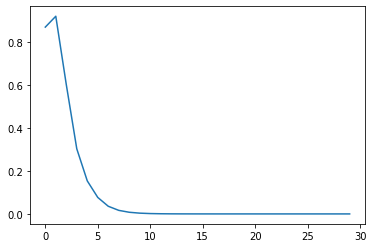

In [73]:
lamb, v, rec = ShiftedInversePowerIteration(A, mu=2.5)
print("eigenvalue = {}, \neigenvector = {}".format(lamb, v))
plt.figure()
plt.plot(rec)
plt.show()

In [70]:
def ShiftedInversePowerIteration(A, mu, eps=10e-10, max_iter=500):
    rec = []
    I = np.identity(A.shape[0])
    v = np.random.randn(A.shape[0])
    v /= np.linalg.norm(v) 
    lu, piv = scipy.linalg.lu_factor(A - mu*I) # compute LU factorization of (A - mu*I)
    for t in range(max_iter):
        y = scipy.linalg.lu_solve((lu, piv), v) #fast compute (A - mu*I)inv*v with LU decomposition
        if(np.linalg.norm(y) < eps):
            print("A has eigencalue 0, try anothor x0")
            return 0, v
        lamb = v.dot(np.dot(A,v))/v.dot(v)
        err = np.linalg.norm(abs(v)-abs(y/np.linalg.norm(y)))
        rec.append(err)
        #print("at iteration {}, diff of vk+1 and vk is {}".format(t, err))
        if err < eps:
            print("Converge at {} iteration(with diff), v = ".format(t), '\n',v)
            return lamb, v, rec
        v = y/np.linalg.norm(y)
    print("Use Max iteration {} still dont converge, v = ".format(max_iter), '\n',v)
    return lamb, v, rec

Converge at 28 iteration(with diff), v =  
 [ 0.34249526  0.18551992 -0.02116534 -0.22217935  0.40769927 -0.36366059
  0.36366059 -0.40769927  0.22217935  0.02116534 -0.18551992 -0.34249526]
eigenvalue = 2.2679491924311224, 
eigenvector = [ 0.34249526  0.18551992 -0.02116534 -0.22217935  0.40769927 -0.36366059
  0.36366059 -0.40769927  0.22217935  0.02116534 -0.18551992 -0.34249526]


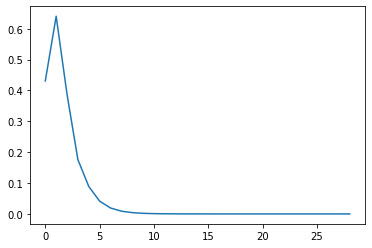

In [71]:
lamb, v, rec = ShiftedInversePowerIteration(A, mu=2.5)
print("eigenvalue = {}, \neigenvector = {}".format(lamb, v))
plt.figure()
plt.plot(rec)
plt.show()

In [95]:
def VariantShiftedInversePowerIteration(A, mu0, eps=10e-10, max_iter=500):
    rec = []
    I = np.identity(A.shape[0])
    v = np.random.randn(A.shape[0])
    v /= np.linalg.norm(v) 
    mu = mu0
    for t in range(max_iter):
        lu, piv = scipy.linalg.lu_factor(A - mu*I)
        y = scipy.linalg.lu_solve((lu, piv), v)
        if(np.linalg.norm(y) < eps):
            print("A has eigencalue 0, try anothor x0")
            return 0, v, rec
        lamb = v.dot(np.dot(A,v))/v.dot(v)
        #err = np.linalg.norm(abs(v)-abs(y/np.linalg.norm(y)))
        err = np.linalg.norm(A@v-lamb*v)
        rec.append(err)
        if t%1 == 0:
            print("at iteration {}, diff of A@v and lamb*v is {}".format(t, err))
        if err < eps:
            print("Converge at {} iteration(with diff), v = ".format(t), '\n',v)
            return lamb, v, rec
        mu = v.T@A@v/v.T.dot(v)
        v = y/np.linalg.norm(y)
        
    print("Use Max iteration {} still dont converge, v = ".format(max_iter), '\n',v)
    return lamb, v, rec

at iteration 0, diff of A@v and lamb*v is 1.6141935129126685
at iteration 1, diff of A@v and lamb*v is 0.12712359891502845
at iteration 2, diff of A@v and lamb*v is 0.18106024720412464
at iteration 3, diff of A@v and lamb*v is 0.009382372211772448
at iteration 4, diff of A@v and lamb*v is 0.00013474928907943677
at iteration 5, diff of A@v and lamb*v is 1.3995902756972318e-07
at iteration 6, diff of A@v and lamb*v is 3.47524551961835e-14
Converge at 6 iteration(with diff), v =  
 [ 0.23471804  0.03625824 -0.17191694 -0.3340271   0.37028534 -0.40663498
  0.40663498 -0.37028534  0.3340271   0.17191694 -0.03625824 -0.23471804]
eigenvalue = 2.2679491924311224, 
eigenvector = [ 0.23471804  0.03625824 -0.17191694 -0.3340271   0.37028534 -0.40663498
  0.40663498 -0.37028534  0.3340271   0.17191694 -0.03625824 -0.23471804]


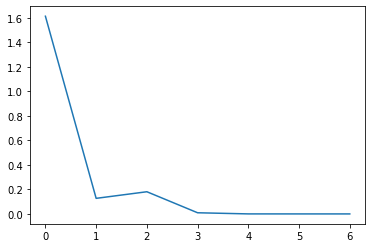

A@v = [ 0.5323286   0.08223184 -0.38989888 -0.7575565   0.83978834 -0.92222747
  0.92222747 -0.83978834  0.7575565   0.38989888 -0.08223184 -0.5323286 ], 
 lamb*v = [ 0.5323286   0.08223184 -0.38989888 -0.7575565   0.83978834 -0.92222747
  0.92222747 -0.83978834  0.7575565   0.38989888 -0.08223184 -0.5323286 ]


In [96]:
lamb, v, rec = VariantShiftedInversePowerIteration(A, mu0=2.2, eps=10e-10, max_iter=500)
print("eigenvalue = {}, \neigenvector = {}".format(lamb, v))
plt.figure()
plt.plot(rec)
plt.show()
print("A@v = {}, \n lamb*v = {}".format(A@v, lamb*v))

In [83]:
#this method is not in problem set, but is snd order convergence version for symmetic matrix
def VariantSymmetricShiftedInversePowerIteration(A, eps=10e-10, max_iter=500): 
    rec = []
    I = np.identity(A.shape[0])
    v = np.random.randn(A.shape[0])
    v /= np.linalg.norm(v) 
    mu = v.T@A@v
    for t in range(max_iter):
        lu, piv = scipy.linalg.lu_factor(A - mu*I)
        y = scipy.linalg.lu_solve((lu, piv), v)
        if(np.linalg.norm(y) < eps):
            print("A has eigencalue 0, try anothor x0")
            return 0, v, rec
        lamb = v.dot(np.dot(A,v))/v.dot(v)
        err = np.linalg.norm(abs(v)-abs(y/np.linalg.norm(y)))
        rec.append(err)
        if t%1 == 0:
            print("at iteration {}, diff of vk+1 and vk is {}".format(t, err))
        if err < eps:
            print("Converge at {} iteration(with diff), v = ".format(t), '\n',v)
            return lamb, v, rec
        v = y/np.linalg.norm(y)
        mu = v.T@A@v
    print("Use Max iteration {} still dont converge, v = ".format(max_iter), '\n',v)
    return lamb, v, rec

at iteration 0, diff of vk+1 and vk is 0.7157082031788093
at iteration 1, diff of vk+1 and vk is 0.35044228937823907
at iteration 2, diff of vk+1 and vk is 0.012617221674645074
at iteration 3, diff of vk+1 and vk is 7.660410516196046e-07
at iteration 4, diff of vk+1 and vk is 1.5503420817984882e-15
Converge at 4 iteration(with diff), v =  
 [ 0.16386361  0.37391895 -0.16386361 -0.37391895 -0.37391895  0.16386361
 -0.16386361  0.37391895  0.37391895  0.16386361 -0.37391895 -0.16386361]
eigenvalue = 4.0, 
eigenvector = [ 0.16386361  0.37391895 -0.16386361 -0.37391895 -0.37391895  0.16386361
 -0.16386361  0.37391895  0.37391895  0.16386361 -0.37391895 -0.16386361]


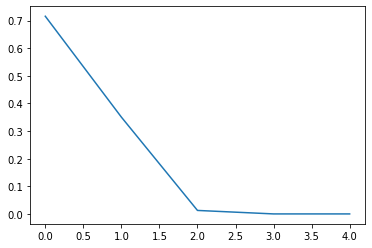

A@v = [ 0.65545444  1.49567581 -0.65545444 -1.49567581 -1.49567581  0.65545444
 -0.65545444  1.49567581  1.49567581  0.65545444 -1.49567581 -0.65545444], 
 lamb*v = [ 0.65545444  1.49567581 -0.65545444 -1.49567581 -1.49567581  0.65545444
 -0.65545444  1.49567581  1.49567581  0.65545444 -1.49567581 -0.65545444]


In [87]:
lamb, v, rec = VariantSymmetricShiftedInversePowerIteration(A, eps=10e-10, max_iter=500)
print("eigenvalue = {}, \neigenvector = {}".format(lamb, v))
plt.figure()
plt.plot(rec)
plt.show()
print("A@v = {}, \n lamb*v = {}".format(A@v, lamb*v))